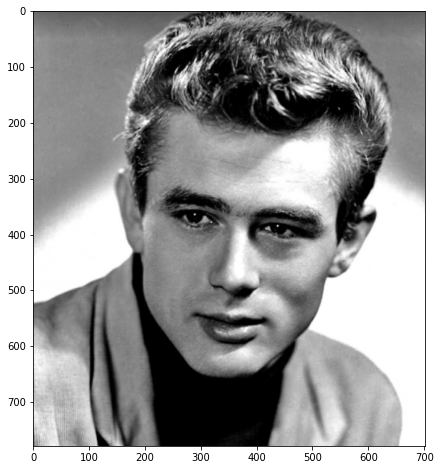

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('./data/james_dean.PNG')
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.show()

In [8]:
import requests

client_id = 'jvPesWUk2FGWsd_XyXXH'
client_secret = '5Wry8AytjH'

url ="https://openapi.naver.com/v1/vision/celebrity"
files = {'image':open('./data/james_dean.PNG', 'rb')}
headers = {'X-Naver-Client-Id':client_id, 'X-Naver-Client-Secret':client_secret}

response = requests.post(url, files=files, headers=headers)

In [9]:
import json

parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 702,
            "height": 779
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "이병헌",
                "confidence": 0.280451
            }
        }
    ]
}


In [10]:
url ="https://openapi.naver.com/v1/vision/face"
files = {'image':open('./data/james_dean.PNG', 'rb')}
headers = {'X-Naver-Client-Id':client_id, 'X-Naver-Client-Secret':client_secret}

response = requests.post(url, files=files, headers=headers)

parsed = json.loads(response.text)
print(json.dumps(parsed, indent=4, sort_keys=False, ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 702,
            "height": 779
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 205,
                "y": 298,
                "width": 327,
                "height": 327
            },
            "landmark": {
                "leftEye": {
                    "x": 291,
                    "y": 364
                },
                "rightEye": {
                    "x": 447,
                    "y": 385
                },
                "nose": {
                    "x": 351,
                    "y": 480
                },
                "leftMouth": {
                    "x": 287,
                    "y": 542
                },
                "rightMouth": {
                    "x": 421,
                    "y": 555
                }
            },
            "gender": {
                "value": "male",
                "confidence": 1.0
            },
            "age

In [12]:
detect_result = json.loads(response.text)
detect_result.keys()

dict_keys(['info', 'faces'])

In [13]:
detect_result['faces']

[{'roi': {'x': 205, 'y': 298, 'width': 327, 'height': 327},
  'landmark': {'leftEye': {'x': 291, 'y': 364},
   'rightEye': {'x': 447, 'y': 385},
   'nose': {'x': 351, 'y': 480},
   'leftMouth': {'x': 287, 'y': 542},
   'rightMouth': {'x': 421, 'y': 555}},
  'gender': {'value': 'male', 'confidence': 1.0},
  'age': {'value': '24~28', 'confidence': 0.185315},
  'emotion': {'value': 'neutral', 'confidence': 0.999948},
  'pose': {'value': 'frontal_face', 'confidence': 0.997454}}]

In [14]:
detect_result['faces'][0]

{'roi': {'x': 205, 'y': 298, 'width': 327, 'height': 327},
 'landmark': {'leftEye': {'x': 291, 'y': 364},
  'rightEye': {'x': 447, 'y': 385},
  'nose': {'x': 351, 'y': 480},
  'leftMouth': {'x': 287, 'y': 542},
  'rightMouth': {'x': 421, 'y': 555}},
 'gender': {'value': 'male', 'confidence': 1.0},
 'age': {'value': '24~28', 'confidence': 0.185315},
 'emotion': {'value': 'neutral', 'confidence': 0.999948},
 'pose': {'value': 'frontal_face', 'confidence': 0.997454}}

In [15]:
detect_result['faces'][0]['roi']

{'x': 205, 'y': 298, 'width': 327, 'height': 327}

In [16]:
detect_result['faces'][0]['gender']

{'value': 'male', 'confidence': 1.0}

In [18]:
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, gen_confidence = detect_result['faces'][0]['gender'].values()
emotion, emotion_confidence = detect_result['faces'][0]['emotion'].values()
age, age_confidence = detect_result['faces'][0]['age'].values()

In [23]:
annotation = gender + ':' + str(gen_confidence) + \
                  '\n' + emotion + ':' + str(emotion_confidence) + \
                  '\n' + age + ':' + str(age_confidence)
print(annotation)

male:1.0
neutral:0.999948
24~28:0.185315


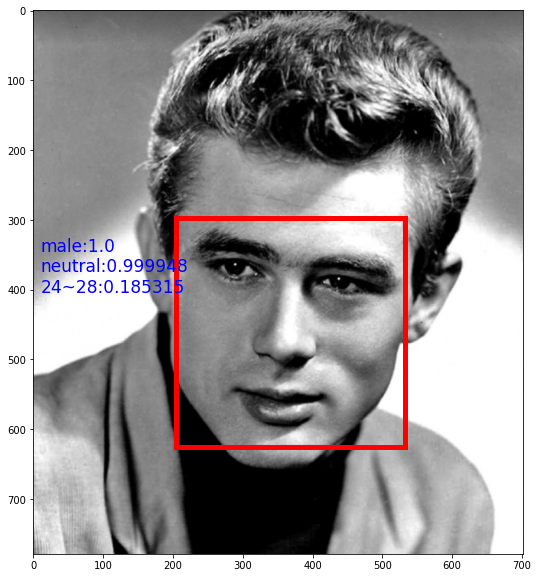

In [27]:
import matplotlib.patches as patches

img = mpimg.imread('./data/james_dean.PNG')
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(img)
rect_face = patches.Rectangle((x, y), w, h, linewidth=5, edgecolor='r', facecolor='none')
ax.add_patch(rect_face)
plt.text(10, 400, annotation, wrap=True, fontsize=17, color='blue')
plt.show()